# Interactive Multimedia Reporting

In [3]:
from datetime import datetime
author = "Yvan Rooseleer"
last_update = datetime.now()
print("Author:", author)
print("Last Update:", last_update)

Author: Yvan Rooseleer
Last Update: 2025-05-30 13:18:03.334605


This cell displays the author and timestamp of the notebook, serving as metadata for documentation purposes.

## Location Example

In [6]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import display  # needed for notebooks

def show_location_on_map(place_name):
    # Geocoding with OpenStreetMap
    geolocator = Nominatim(user_agent="my_map_app")
    location = geolocator.geocode(place_name)

    if location:
        # print(f"Found: {location.address}")
        print(f"Coordinates: {location.latitude}, {location.longitude}")

        # Create and display the map
        # mymap = folium.Map(location=[location.latitude, location.longitude], zoom_start=15)
        mymap = folium.Map(location=[location.latitude, location.longitude], width=600, height=400, zoom_start=15)
        # mymap = folium.Map(location=[location.latitude, location.longitude], width="400px", height="300px", zoom_start=15)
        folium.Marker([location.latitude, location.longitude], popup=location.address).add_to(mymap)

        display(mymap)  # this ensures it renders in the notebook
    else:
        print("Location not found.")


# Run previous cell first
# Request realtime location input
# location_requested = input("What location would you like to see? (e.g. Eiffel Tower, Paris)")
location_requested = "Brussels, Belgium"
map_output = show_location_on_map(location_requested)
if map_output:
    map_output

Coordinates: 50.8465573, 4.351697


🔍 The map above shows the geolocation of a given place using the `folium` library. It demonstrates how to embed maps in a report.

# Weather Data Example

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)
df.head()

,Month,Max Temp,Min Temp,Sunny Days,Cloudy Days,Rainy Days
0,January,10,-1,5,15,11
1,February,12,0,6,12,11
2,March,15,2,8,14,9
3,April,18,5,12,10,8
4,May,22,9,14,9,8


📈 Here we load a dataset with monthly weather data for Brussels in 2020. The data will be used in subsequent visualizations.

## Line Graph

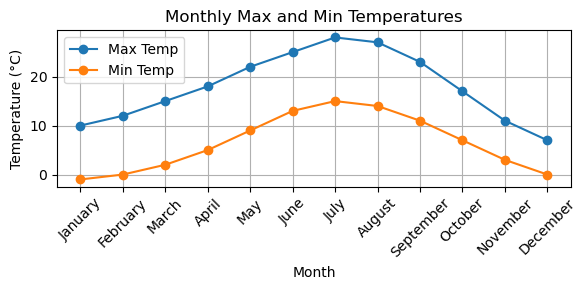

In [12]:
# Run previous cell first
# LINE GRAPH: Max and Min Temperatures per Month
# plt.figure(figsize=(10, 5))
plt.figure(figsize=(6, 3))
plt.plot(df['Month'], df['Max Temp'], marker='o', label='Max Temp')
plt.plot(df['Month'], df['Min Temp'], marker='o', label='Min Temp')
plt.title('Monthly Max and Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🌡️ This line chart shows maximum and minimum temperatures per month, revealing seasonal variations in the data.

## Bar Graph

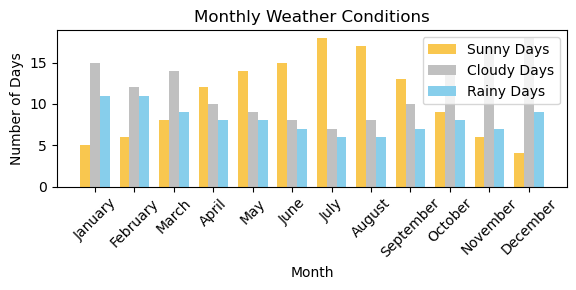

In [15]:
import matplotlib.pyplot as plt

# BAR GRAPH: Sunny, Cloudy, and Rainy Days per Month
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(6, 3))
bar_width = 0.25
x = range(len(df['Month']))

# Define colors
sunny_color = '#f9c74f'   # yellow/gold
cloudy_color = 'silver'   # silver
rainy_color = '#87ceeb'   # bluesky 

# Plot bars with custom colors
plt.bar([i - bar_width for i in x], df['Sunny Days'], width=bar_width, label='Sunny Days', color=sunny_color)
plt.bar(x, df['Cloudy Days'], width=bar_width, label='Cloudy Days', color=cloudy_color)
plt.bar([i + bar_width for i in x], df['Rainy Days'], width=bar_width, label='Rainy Days', color=rainy_color)

plt.title('Monthly Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(ticks=x, labels=df['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Scatter Chart

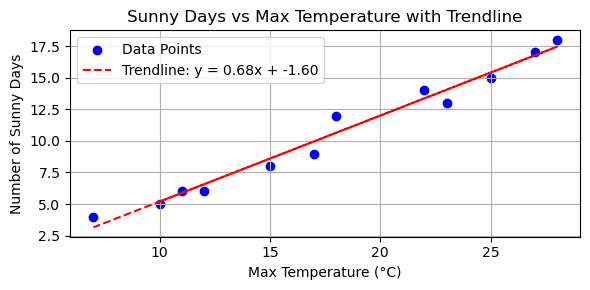

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust if needed
df = pd.read_excel(file_path)

# Scatter chart with trendline
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(6, 3))
x = df['Max Temp']       # Filtering dataframe on Max Temp
y = df['Sunny Days']     # Filtering on Sunny Days

# Plot scatter points in blue
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate and plot linear trendline (red dashed line)
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label=f'Trendline: y = {z[0]:.2f}x + {z[1]:.2f}')

# Chart formatting
plt.title('Sunny Days vs Max Temperature with Trendline')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Sunny Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**End of the report**